## Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV, Lasso, LassoCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from imblearn.over_sampling import SMOTE

## Dataset
Load transformed dataset.

In [69]:
df = pd.read_csv("ppp_transformed.csv")
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerCity,BorrowerState,BorrowerZip,LoanStatus,Term,...,MORTGAGE_INTEREST_PROCEED_pct_standardised,RENT_PROCEED_pct_standardised,REFINANCE_EIDL_PROCEED_pct_standardised,HEALTH_CARE_PROCEED_pct_standardised,DEBT_INTEREST_PROCEED_pct_standardised,InitialApprovalAmount_scaled_standardised,CurrentApprovalAmount_scaled_standardised,TOTAL_PROCEED_scaled_standardised,PROCEED_Per_Job_scaled_standardised,isFraud
0,9547507704,2020-05-01,464,PPP,sumter coatings inc,sumter,UNK,29150-9662,Paid in Full,24,...,-0.117829,-0.259507,-0.024109,-0.175324,-0.069127,0.316451,0.321404,0.321407,-0.004019,0
1,9777677704,2020-05-01,464,PPP,pleasant places inc,north charleston,UNK,29420-9000,Paid in Full,24,...,-0.117829,-0.259507,-0.024109,-0.175324,-0.069127,0.272954,0.277532,0.277535,-0.118508,0
2,6223567700,2020-05-01,920,PPP,kirtley construction inc,san bernardino,UNK,92407-1740,Paid in Full,24,...,-0.117829,-0.259507,-0.024109,-0.175324,-0.069127,-0.044994,-0.043156,-0.043153,0.559708,0
3,9662437702,2020-05-01,101,PPP,aero box llc,unknown,UNK,0,Paid in Full,24,...,-0.117829,-0.259507,-0.024109,-0.175324,-0.069127,-0.222618,-0.222312,-0.222309,0.109201,0
4,9774337701,2020-05-01,101,PPP,hudson extrusions inc,unknown,UNK,0,Paid in Full,24,...,-0.117829,-0.259507,-0.024109,-0.175324,-0.069127,-0.274386,-0.274526,-0.274523,0.121559,0


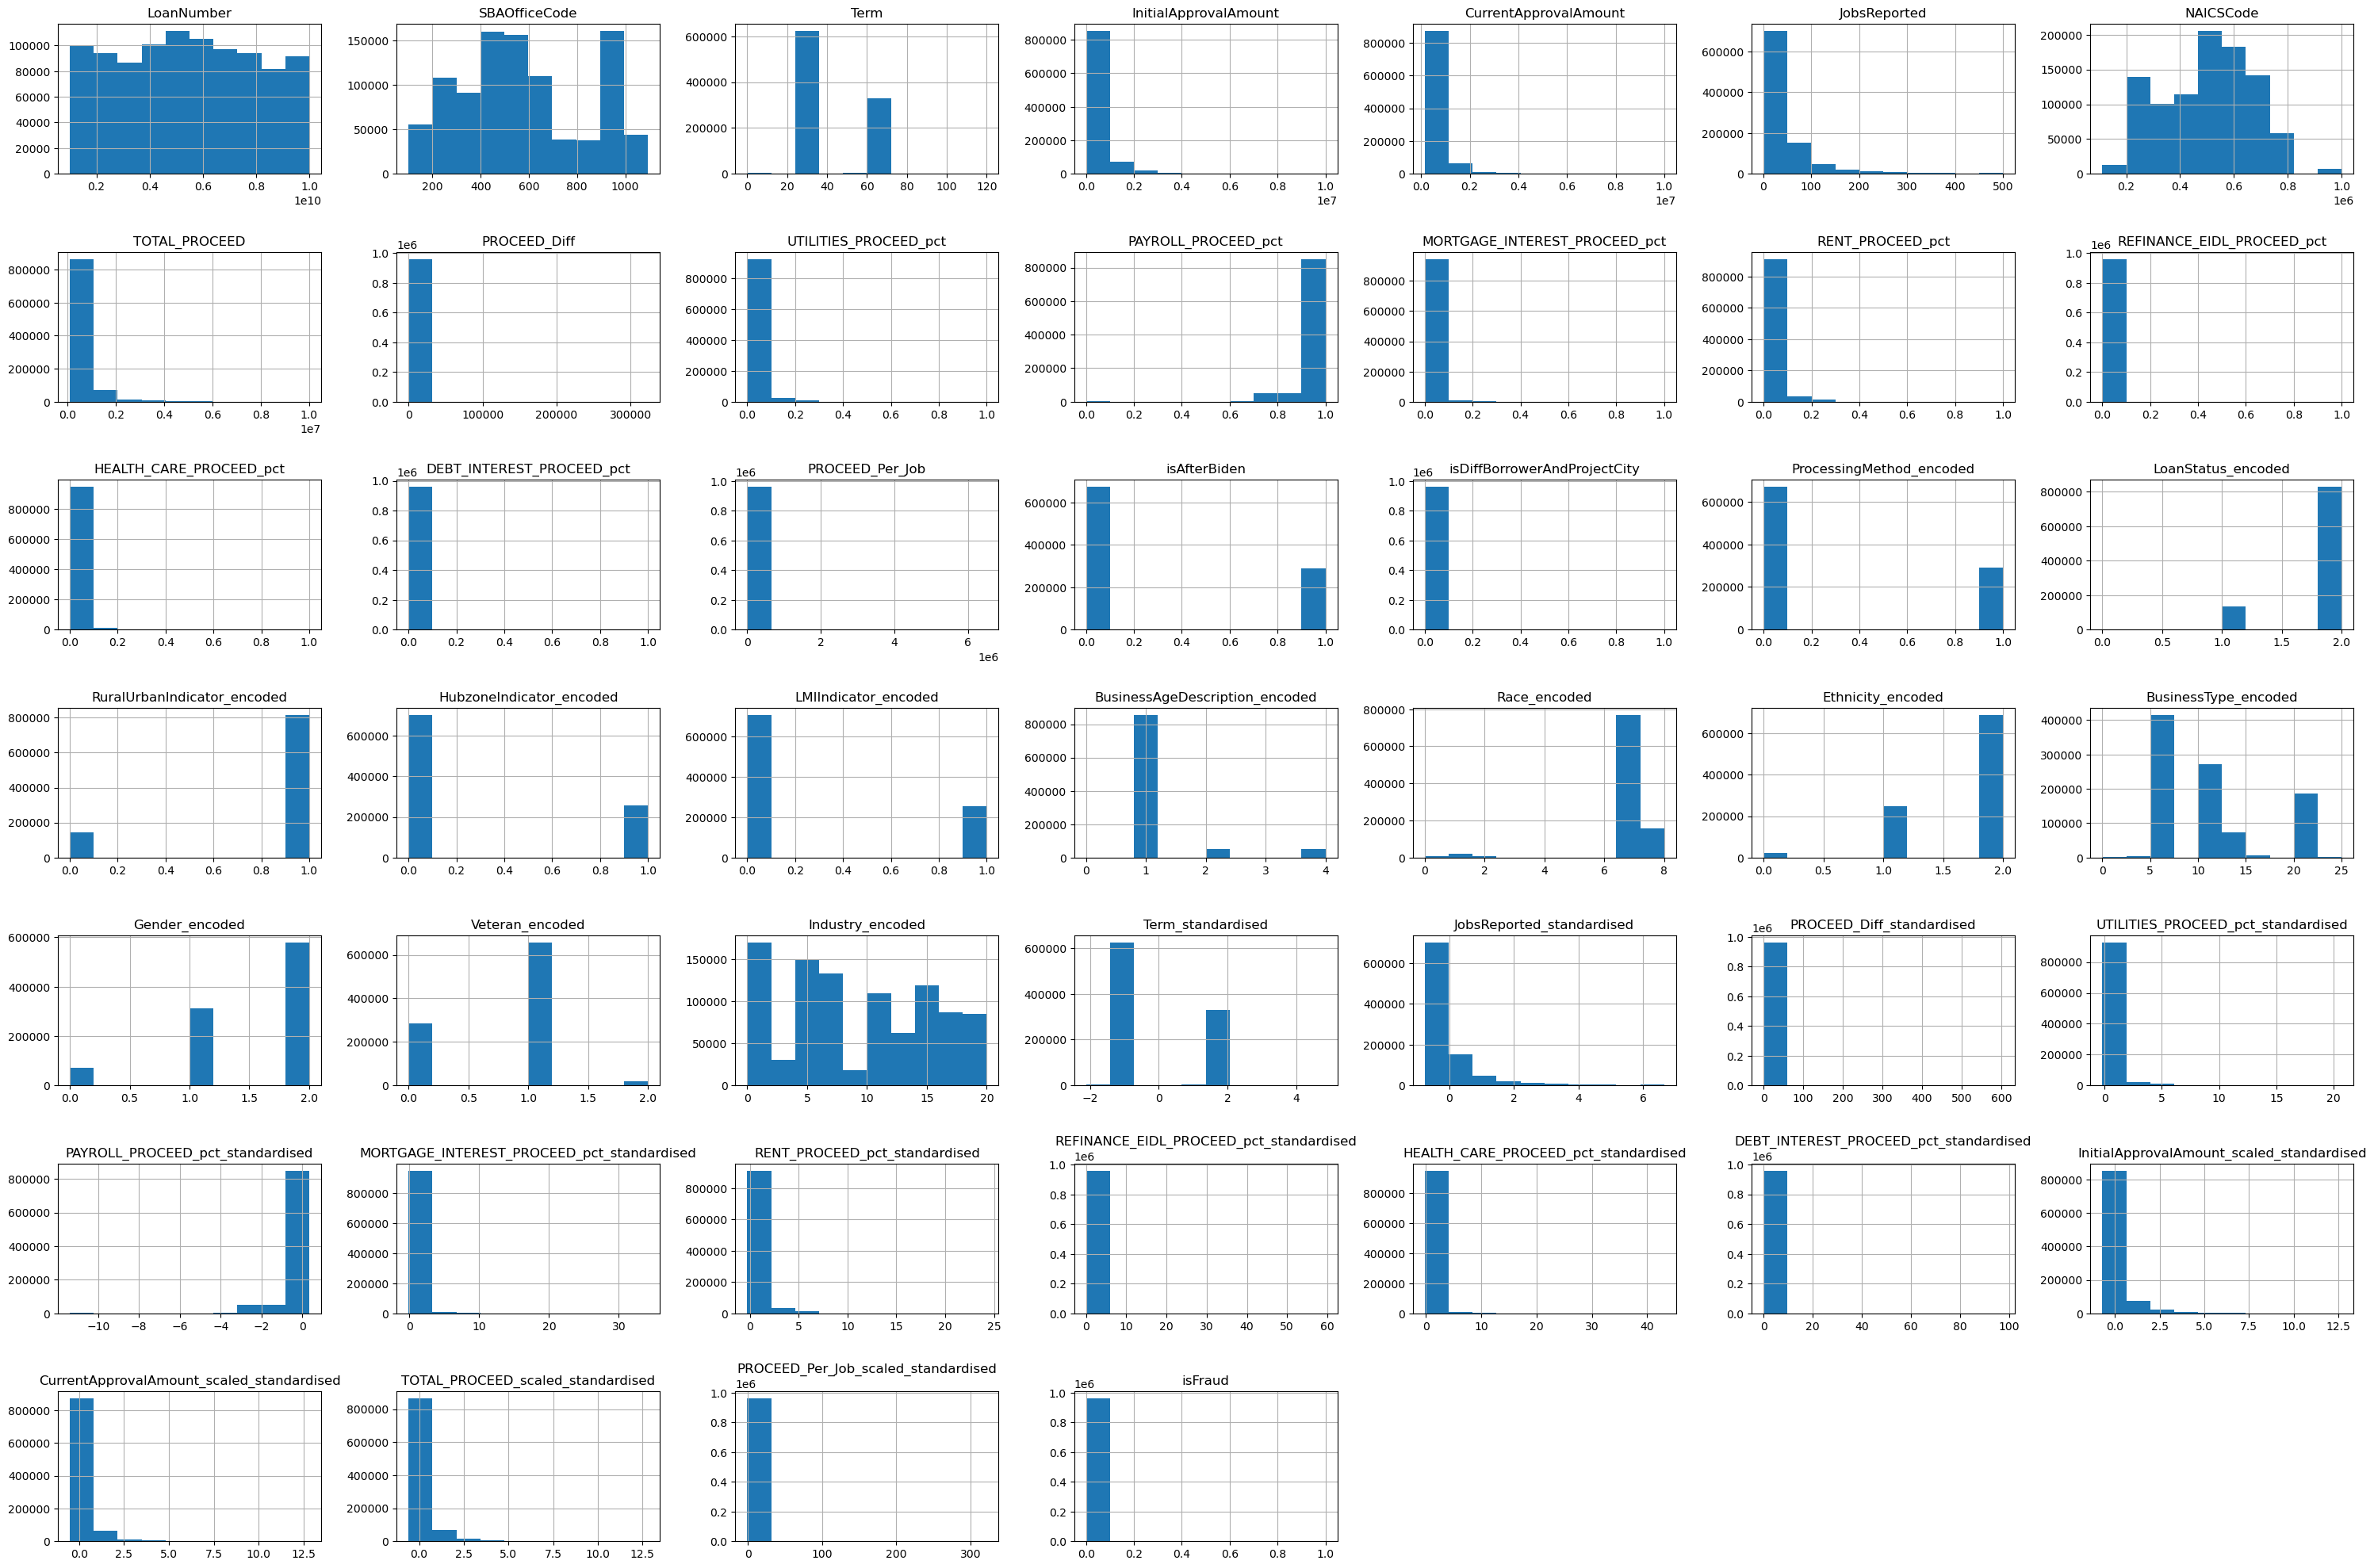

In [70]:
# visual inspection of the data
df.hist(figsize = (30,20))
plt.tight_layout(pad = 1.5)
plt.show()

In [71]:
df.groupby('isFraud').count()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerCity,BorrowerState,BorrowerZip,LoanStatus,Term,...,PAYROLL_PROCEED_pct_standardised,MORTGAGE_INTEREST_PROCEED_pct_standardised,RENT_PROCEED_pct_standardised,REFINANCE_EIDL_PROCEED_pct_standardised,HEALTH_CARE_PROCEED_pct_standardised,DEBT_INTEREST_PROCEED_pct_standardised,InitialApprovalAmount_scaled_standardised,CurrentApprovalAmount_scaled_standardised,TOTAL_PROCEED_scaled_standardised,PROCEED_Per_Job_scaled_standardised
isFraud,,,,,,,,,,,,,,,,,,,,,
0,961810,961810,961810,961810,961803,961810,961810,961810,961810,961810,...,961810,961810,961810,961810,961810,961810,961810,961810,961810,961810
1,89,89,89,89,89,89,89,89,89,89,...,89,89,89,89,89,89,89,89,89,89


There is a significantly larger number of non-fraud cases versus fraud cases (961810 to 89). This poses an issue for model training, hence we need to balance the data.

In [72]:
# to check the column headers and useful for later
df.columns

Index(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerName', 'BorrowerCity', 'BorrowerState', 'BorrowerZip',
       'LoanStatus', 'Term', 'InitialApprovalAmount', 'CurrentApprovalAmount',
       'FranchiseName', 'ServicingLenderName', 'ServicingLenderZip',
       'RuralUrbanIndicator', 'HubzoneIndicator', 'LMIIndicator',
       'BusinessAgeDescription', 'ProjectCity', 'JobsReported', 'NAICSCode',
       'Race', 'Ethnicity', 'BusinessType', 'Gender', 'Veteran',
       'TOTAL_PROCEED', 'PROCEED_Diff', 'UTILITIES_PROCEED_pct',
       'PAYROLL_PROCEED_pct', 'MORTGAGE_INTEREST_PROCEED_pct',
       'RENT_PROCEED_pct', 'REFINANCE_EIDL_PROCEED_pct',
       'HEALTH_CARE_PROCEED_pct', 'DEBT_INTEREST_PROCEED_pct',
       'PROCEED_Per_Job', 'isAfterBiden', 'isDiffBorrowerAndProjectCity',
       'Industry', 'Subsector', 'ProcessingMethod_encoded',
       'LoanStatus_encoded', 'RuralUrbanIndicator_encoded',
       'HubzoneIndicator_encoded', 'LMIIndicator_encoded'

In [73]:
for col in df.columns:
    if "encoded" in col:
        print(col)

ProcessingMethod_encoded
LoanStatus_encoded
RuralUrbanIndicator_encoded
HubzoneIndicator_encoded
LMIIndicator_encoded
BusinessAgeDescription_encoded
Race_encoded
Ethnicity_encoded
BusinessType_encoded
Gender_encoded
Veteran_encoded
Industry_encoded


In [74]:
# variables to convert to dummy
dummies = ['ProcessingMethod','LoanStatus','RuralUrbanIndicator','HubzoneIndicator','LMIIndicator','BusinessAgeDescription','Race','Ethnicity','BusinessType','Gender','Veteran','Industry']

In [75]:
# drop the following variables which have an encoded variation
drop_var = ['isFraud', 'LoanNumber', 'DateApproved', 'SBAOfficeCode', 
            'BorrowerName', 'BorrowerCity', 'BorrowerState', 'BorrowerZip',
            'Term', 'InitialApprovalAmount', 'CurrentApprovalAmount',
            'FranchiseName', 'ServicingLenderName', 'ServicingLenderZip',
            'ProjectCity', 'JobsReported', 'NAICSCode',
            'TOTAL_PROCEED', 'PROCEED_Diff', 'UTILITIES_PROCEED_pct',
            'PAYROLL_PROCEED_pct', 'MORTGAGE_INTEREST_PROCEED_pct',
            'RENT_PROCEED_pct', 'REFINANCE_EIDL_PROCEED_pct',
            'HEALTH_CARE_PROCEED_pct', 'DEBT_INTEREST_PROCEED_pct',
            'PROCEED_Per_Job', 'isAfterBiden', 'isDiffBorrowerAndProjectCity',
            'Subsector','ProcessingMethod_encoded',
            'LoanStatus_encoded', 'RuralUrbanIndicator_encoded',
            'HubzoneIndicator_encoded', 'LMIIndicator_encoded',
            'BusinessAgeDescription_encoded', 'Race_encoded', 'Ethnicity_encoded',
            'BusinessType_encoded', 'Gender_encoded', 'Veteran_encoded',
            'Industry_encoded']

# split train-test dataset
X = df.drop(drop_var, axis = 1)
y = df['isFraud']

# assign dummy variables
X = pd.get_dummies(X, columns = dummies, drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

In [76]:
# get dummy variables for X_train
# pd.get_dummies(X_train, columns = dummies, drop_first = True)

In [77]:
# reassign X_train with dummy variables


In [78]:
# due to imbalance, use SMOTE to oversample the minority class
smote = SMOTE(random_state = 99)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [79]:
y_train_resampled.value_counts()

0    769452
1    769452
Name: isFraud, dtype: int64

## Initial modelling

These models are not the final models. This is to take a look at how well the data fits.

### Ridge Regression (Classification)
Ridge regression (classifier) prevents overfitting by penalising coefficients of variables. This removes the need for significant feature engineering and also highlights the more important features. <br>
This model will be compared to the LASSO model later, which features a similar penalty mechanism, but will reduce the coefficient to 0. 

In [80]:
# train ridge classifier model

ridge_classifier = RidgeClassifier(alpha = 1.0, solver = 'auto')

ridge_classifier.fit(X_train_resampled, y_train_resampled)

RidgeClassifier()

In [81]:
ridge_classifier.score(X_test, y_test)

0.9582389021727831

In [82]:
# model evaluation on accuracy
y_pred = ridge_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report_result}')

Accuracy: 0.9582389021727831
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    192358
           1       0.00      0.64      0.00        22

    accuracy                           0.96    192380
   macro avg       0.50      0.80      0.49    192380
weighted avg       1.00      0.96      0.98    192380



In [83]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[184332,   8026],
       [     8,     14]], dtype=int64)

In [84]:
ridge_coeff = pd.DataFrame(ridge_classifier.coef_[0], X_train_resampled.columns, columns = ['Coefficients'])
ridge_coeff

,Coefficients
Term_standardised,-0.007596
JobsReported_standardised,-0.107345
PROCEED_Diff_standardised,-0.000200
UTILITIES_PROCEED_pct_standardised,0.005724
PAYROLL_PROCEED_pct_standardised,0.037349
...,...
Industry_Real estate and rental and leasing,-0.440734
Industry_Retail trade,-0.388712
Industry_Transportation and warehousing,-0.316427
Industry_Utilities,-0.611497


In [85]:
# sort features by importance
ridge_coeff.sort_values(by = 'Coefficients') 

# the values are sorted in ascending order, which is not always accurate
# hence, create a new column for the absolute values
ridge_coeff['Abs Coeff'] = ridge_coeff['Coefficients'].abs()
ridge_coeff.sort_values(by = 'Abs Coeff', ascending = False) 

,Coefficients,Abs Coeff
LoanStatus_Paid in Full,-1.139267,1.139267
BusinessType_Self-Employed Individuals,-1.088349,1.088349
BusinessType_Single Member LLC,-1.053754,1.053754
BusinessType_Housing Co-op,-0.767071,0.767071
BusinessType_Independent Contractors,-0.741071,0.741071
...,...,...
UTILITIES_PROCEED_pct_standardised,0.005724,0.005724
HEALTH_CARE_PROCEED_pct_standardised,-0.005685,0.005685
DEBT_INTEREST_PROCEED_pct_standardised,-0.004658,0.004658
REFINANCE_EIDL_PROCEED_pct_standardised,-0.004293,0.004293


### Lasso Regression (Classification)
Using the same train-test data as ridge, build a LASSO classification model.

In [86]:
# train lasso model
lasso_classifier = Lasso(alpha = 0.01)

lasso_classifier.fit(X_train_resampled, y_train_resampled)

Lasso(alpha=0.01)

In [87]:
# predict y values based on lasso model
y_pred_lasso = lasso_classifier.predict(X_test)

# note that prediction output is 0 < y < 1, hence convert into binary
y_pred_lasso_binary = [1 if i > 0.5 else 0 for i in y_pred_lasso]

# generate accuracy and classification report
accuracy_lasso = accuracy_score(y_test, y_pred_lasso_binary)
classification_report_result_lasso = classification_report(y_test, y_pred_lasso_binary)

print(f'Accuracy: {accuracy_lasso}')
print(f'Classification Report:\n{classification_report_result_lasso}')

Accuracy: 0.8732352635409086
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    192358
           1       0.00      0.95      0.00        22

    accuracy                           0.87    192380
   macro avg       0.50      0.91      0.47    192380
weighted avg       1.00      0.87      0.93    192380



In [88]:
confusion_matrix(y_test, y_pred_lasso_binary)

array([[167972,  24386],
       [     1,     21]], dtype=int64)

In [89]:
lasso_coeff = pd.DataFrame(lasso_classifier.coef_, X_train_resampled.columns, columns = ['Coefficients'])
lasso_coeff

,Coefficients
Term_standardised,-0.011325
JobsReported_standardised,-0.030301
PROCEED_Diff_standardised,-0.000000
UTILITIES_PROCEED_pct_standardised,-0.000000
PAYROLL_PROCEED_pct_standardised,0.020493
...,...
Industry_Real estate and rental and leasing,-0.000000
Industry_Retail trade,-0.000000
Industry_Transportation and warehousing,-0.000000
Industry_Utilities,-0.000000


In [90]:
# sort features by importance
lasso_coeff.sort_values(by = 'Coefficients') 

# the values are sorted in ascending order, which is not always accurate
# hence, create a new column for the absolute values
lasso_coeff['Abs Coeff'] = lasso_coeff['Coefficients'].abs()
lasso_coeff.sort_values(by = 'Abs Coeff', ascending = False)

,Coefficients,Abs Coeff
LoanStatus_Paid in Full,-0.664366,0.664366
ProcessingMethod_PPS,-0.181378,0.181378
BusinessAgeDescription_Existing or more than 2 years old,-0.095564,0.095564
BusinessType_Corporation,-0.073357,0.073357
BusinessType_Subchapter S Corporation,-0.064588,0.064588
...,...,...
Race_White,-0.000000,0.000000
Race_Unanswered,-0.000000,0.000000
Race_Puerto Rican,-0.000000,0.000000
Race_Native Hawaiian or Other Pacific Islander,-0.000000,0.000000


In [91]:
# drop 0 coefficients
lasso_coeff = lasso_coeff.drop(lasso_coeff[lasso_coeff['Coefficients'] == 0].index)
lasso_coeff.sort_values(by = 'Abs Coeff', ascending = False)

,Coefficients,Abs Coeff
LoanStatus_Paid in Full,-0.664366,0.664366
ProcessingMethod_PPS,-0.181378,0.181378
BusinessAgeDescription_Existing or more than 2 years old,-0.095564,0.095564
BusinessType_Corporation,-0.073357,0.073357
BusinessType_Subchapter S Corporation,-0.064588,0.064588
LMIIndicator_Y,-0.051011,0.051011
HubzoneIndicator_Y,-0.049724,0.049724
Gender_Male Owned,-0.039397,0.039397
JobsReported_standardised,-0.030301,0.030301
PAYROLL_PROCEED_pct_standardised,0.020493,0.020493


## Hyperparameter Tuning

Notice that in LASSO, the alpha value is not 1.0 like Ridge. This is due to LASSO reducing all values to 0. 

Hence, the next step is to tune the alpha value and find the best value. 

This will be evaluated on _____.

### Ridge Classifier Cross Validation

In [92]:
# generate alpha values
alphas = np.array([i/10 for i in range(1, 11)])
alphas

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [93]:
# train model using various alpha values, scoring on 'recall'
ridge_classifier_cv = RidgeClassifierCV(alphas, scoring = 'accuracy')
ridge_classifier_cv.fit(X_train_resampled, y_train_resampled)

RidgeClassifierCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                  scoring='accuracy')

In [94]:
y_pred_rcv = ridge_classifier_cv.predict(X_test)

accuracy_rcv = accuracy_score(y_test, y_pred_rcv)
classification_report_result_rcv = classification_report(y_test, y_pred_rcv)

print(f'Accuracy: {accuracy_rcv}')
print(f'Classification Report:\n{classification_report_result_rcv}')

Accuracy: 0.958244100218318
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    192358
           1       0.00      0.64      0.00        22

    accuracy                           0.96    192380
   macro avg       0.50      0.80      0.49    192380
weighted avg       1.00      0.96      0.98    192380



In [95]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_rcv))
print("")
print(confusion_matrix(y_test, y_pred))

[[184333   8025]
 [     8     14]]

[[184332   8026]
 [     8     14]]


#### Testing against the full data set

In [96]:
full_test = ridge_classifier_cv.predict(X)

accuracy_full = accuracy_score(y, full_test)
classification_report_result_full = classification_report(y, full_test)

print(f'Accuracy: {accuracy_full}')
print(f'Classification Report:\n{classification_report_result_full}')

Accuracy: 0.9588293573441702
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    961810
           1       0.00      0.61      0.00        89

    accuracy                           0.96    961899
   macro avg       0.50      0.78      0.49    961899
weighted avg       1.00      0.96      0.98    961899



In [97]:
confusion_matrix(y, full_test)

array([[922243,  39567],
       [    35,     54]], dtype=int64)

In [98]:
ridge_coeff_cv = pd.DataFrame(ridge_classifier_cv.coef_[0], X_train_resampled.columns, columns = ['Coefficients'])
ridge_coeff_cv['Abs Coeff'] = ridge_coeff_cv['Coefficients'].abs()
ridge_coeff_cv.sort_values(by = 'Abs Coeff', ascending = False) 

,Coefficients,Abs Coeff
LoanStatus_Paid in Full,-1.139258,1.139258
BusinessType_Self-Employed Individuals,-1.090873,1.090873
BusinessType_Single Member LLC,-1.068169,1.068169
BusinessType_Housing Co-op,-0.772603,0.772603
BusinessType_Independent Contractors,-0.748554,0.748554
...,...,...
UTILITIES_PROCEED_pct_standardised,0.006142,0.006142
HEALTH_CARE_PROCEED_pct_standardised,-0.005483,0.005483
DEBT_INTEREST_PROCEED_pct_standardised,-0.004568,0.004568
REFINANCE_EIDL_PROCEED_pct_standardised,-0.004146,0.004146


### LASSO Classification Cross Validation

In [129]:
# generate alpha values as list (because whoever wrote this can't keep it consistent)
alphas = [i/100 for i in range(1, 101)]
alphas

[0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0]

In [130]:
# train Lasso cv model
lasso_classifier_cv = LassoCV(n_alphas = 10, alphas = alphas, cv = 10)
lasso_classifier_cv.fit(X_train_resampled, y_train_resampled)

LassoCV(alphas=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11,
                0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22,
                0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, ...],
        cv=10, n_alphas=10)

In [131]:
# predict y values based on lasso model
y_pred_lcv = lasso_classifier_cv.predict(X_test)

# note that prediction output is 0 < y < 1, hence convert into binary
y_pred_lcv_binary = [1 if i > 0.5 else 0 for i in y_pred_lcv]

# generate accuracy and classification report
accuracy_lcv = accuracy_score(y_test, y_pred_lcv_binary)
classification_report_result_lcv = classification_report(y_test, y_pred_lcv_binary)

print(f'Accuracy: {accuracy_lcv}')
print(f'Classification Report:\n{classification_report_result_lcv}')

Accuracy: 0.8732352635409086
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    192358
           1       0.00      0.95      0.00        22

    accuracy                           0.87    192380
   macro avg       0.50      0.91      0.47    192380
weighted avg       1.00      0.87      0.93    192380



#### Testing against the full dataset

In [132]:
full_test = lasso_classifier_cv.predict(X)

full_test_binary = [1 if i > 0.5 else 0 for i in full_test]

accuracy_full = accuracy_score(y, full_test_binary)
classification_report_result_full = classification_report(y, full_test_binary)

print(f'Accuracy: {accuracy_full}')
print(f'Classification Report:\n{classification_report_result_full}')

Accuracy: 0.8730490415313874
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    961810
           1       0.00      0.91      0.00        89

    accuracy                           0.87    961899
   macro avg       0.50      0.89      0.47    961899
weighted avg       1.00      0.87      0.93    961899



In [133]:
confusion_matrix(y, full_test_binary)

array([[839704, 122106],
       [     8,     81]], dtype=int64)

In [134]:
lasso_coeff_cv = pd.DataFrame(lasso_classifier_cv.coef_, X_train_resampled.columns, columns = ['Coefficients'])
lasso_coeff_cv['Abs Coeff'] = lasso_coeff_cv['Coefficients'].abs()
lasso_coeff_cv.sort_values(by = 'Abs Coeff', ascending = False)

# drop 0 coefficients
lasso_coeff_cv = lasso_coeff_cv.drop(lasso_coeff_cv[lasso_coeff_cv['Coefficients'] == 0].index)
lasso_coeff_cv.sort_values(by = 'Abs Coeff', ascending = False)

,Coefficients,Abs Coeff
LoanStatus_Paid in Full,-0.664366,0.664366
ProcessingMethod_PPS,-0.181378,0.181378
BusinessAgeDescription_Existing or more than 2 years old,-0.095564,0.095564
BusinessType_Corporation,-0.073357,0.073357
BusinessType_Subchapter S Corporation,-0.064588,0.064588
LMIIndicator_Y,-0.051011,0.051011
HubzoneIndicator_Y,-0.049724,0.049724
Gender_Male Owned,-0.039397,0.039397
JobsReported_standardised,-0.030301,0.030301
PAYROLL_PROCEED_pct_standardised,0.020493,0.020493


0.01 -660.8560438692961
0.02 -723.8084681100636
0.03 -791.2921697864685
0.04 -837.1457575927489
0.05 -867.2549080210787
0.06 -904.4461787904362
0.07 -950.1821180805231
0.08 -1004.4623080604229
0.09 -1067.2868391099016
0.1 -1138.6561608410227
0.11 -1203.7734411895974
0.12 -1276.3099850674878
0.13 -1356.9003305090046
0.14 -1445.544477514147
0.15 -1542.2424260829152
0.16 -1646.99417621531
0.17 -1759.7997279113292
0.18 -1880.6590811709748
0.19 -2009.572235994247
0.2 -2146.539192381144
0.21 -2185.386392228884
0.22 -2185.386392228884
0.23 -2185.386392228884
0.24 -2185.386392228884
0.25 -2185.386392228884
0.26 -2185.386392228884
0.27 -2185.386392228884
0.28 -2185.386392228884
0.29 -2185.386392228884
0.3 -2185.386392228884
0.31 -2185.386392228884
0.32 -2185.386392228884
0.33 -2185.386392228884
0.34 -2185.386392228884
0.35 -2185.386392228884
0.36 -2185.386392228884
0.37 -2185.386392228884
0.38 -2185.386392228884
0.39 -2185.386392228884
0.4 -2185.386392228884
0.41 -2185.386392228884
0.42 -2185.3

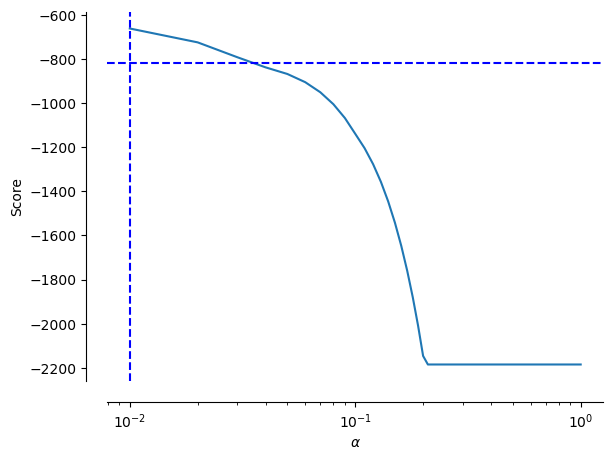

In [135]:
import seaborn as sns 

score = lasso_classifier_cv.score(X,y)
alpha = lasso_classifier_cv.alpha_

scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train_resampled, y_train_resampled)
    scores[i] = lasso.score(X_test, y_test)
    print(a, scores[i])

plt.plot(alphas, scores)
plt.axhline(score, color='b', ls='--')
plt.axvline(alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)